# Titanic dataset - Individual Project

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

We want to answer the question 'What sorts of people were more likely to survive?' using visualizations.

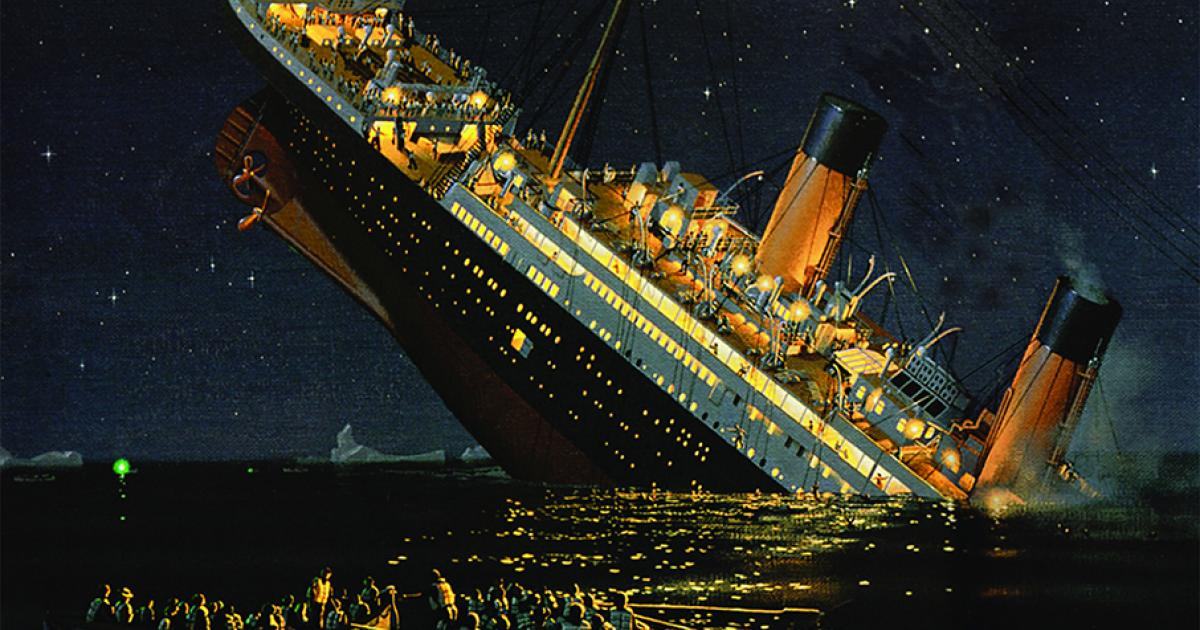

# Importing necessary packages

In [111]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.express as px
import plotly.graph_objs as go
from ipywidgets import interact, Dropdown
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Description

| Variable | Description                                  | Values                               |
|----------|----------------------------------------------|--------------------------------------|
| PassengerId|  ID of passenger
| Survived | Outcome of survival                          | 0 = No; 1 = Yes                      |
| Pclass   | Ticket class                                 | 1 = Upper class; 2 = Middle class; 3 = Lower class |
| Name     | Name of passenger                            |                                      |
| Sex      | Sex of the passenger                         | male or female                       |
| Age      | Age of the passenger (Some entries contain NaN) |                                     |
| SibSp    | Number of siblings and spouses of the passenger aboard |                                |
| Parch    | Number of parents and children of the passenger aboard |                              |
| Ticket   | Ticket number of the passenger               |                                      |
| Fare     | Fare paid by the passenger  (in dollars)                 |                                      |
| Cabin    | Cabin number of the passenger (Some entries contain NaN) |                           |
| Embarked | Port of embarkation of the passenger         | C = Cherbourg; Q = Queenstown; S = Southampton |


# Loading the Titanic dataset

In [112]:
titanic = pd.read_csv("Titanic-Dataset.csv")

In [113]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing 

In [114]:
titanic.shape

(891, 12)

In [115]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
titanic.duplicated().sum()

0

## Missing values

In [117]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

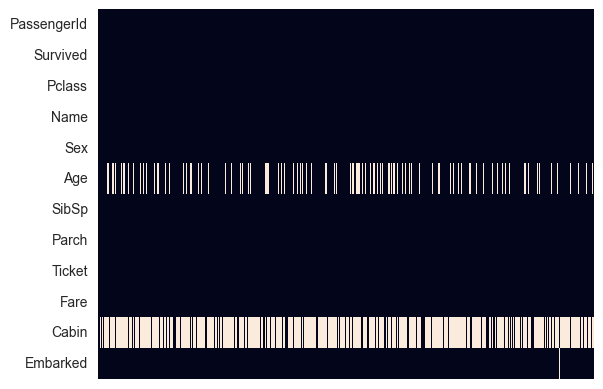

In [118]:
sns.heatmap(titanic.isna().T, xticklabels=False, cbar=False)

In [119]:
titanic.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

## Dealing with missing values

In [120]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [121]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

## Dropping Unnecessary Columns

In [122]:
titanic=titanic.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

## Some changes

In [123]:
titanic['Survived']=titanic['Survived'].replace({1:'survived',0:'dead'})

In [124]:
titanic['Embarked']=titanic['Embarked'].replace({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})

In [125]:
titanic['Pclass']=titanic['Pclass'].replace({1:'Upper class',2:'Middle class',3:'Lower class'})

## Final cleaned dataset

In [126]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,dead,Lower class,male,22.0,1,0,7.2500,Southampton
1,survived,Upper class,female,38.0,1,0,71.2833,Cherbourg
2,survived,Lower class,female,26.0,0,0,7.9250,Southampton
3,survived,Upper class,female,35.0,1,0,53.1000,Southampton
4,dead,Lower class,male,35.0,0,0,8.0500,Southampton


# Describe tables and Correlation matrix

### Describe table for numerical columns

In [127]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Age:**
- The mean age of passengers is approximately **29.36** years, with a standard deviation of **13.02** years.
- The youngest passenger was **0.42** years old (about 5 months), while the oldest passenger was **80** years old.
- The majority of passengers were between **22** and **35** years old, as indicated by the 25th, 50th (median), and 75th percentiles.

**SibSp (Number of Siblings/Spouses Aboard):**
- The mean number of siblings/spouses aboard is approximately **0.52**, with a standard deviation of **1.10**.
- Most passengers (approximately 75%) traveled without siblings or spouses, as indicated by the 75th percentile value of **1**.

**Parch (Number of Parents/Children Aboard):**
- The mean number of parents/children aboard is approximately **0.38**, with a standard deviation of **0.81**.
- Similarly, most passengers (approximately 75%) traveled without parents or children.

**Fare:**
- The mean fare paid by passengers is approximately **32.20**, with a standard deviation of **49.69**.
- The minimum fare is **0**, which might indicate some missing or free tickets.Since we don't have missing values, it may be free tickets for employees or some people
- The fare distribution is skewed, with most fares falling below **31**, as indicated by the 75th percentile value.


### Describe table for object columns

In [128]:
titanic.describe(include='object').T

,count,unique,top,freq
Survived,891,2,dead,549
Pclass,891,3,Lower class,491
Sex,891,2,male,577
Embarked,891,3,Southampton,646


**Survived:**
- Count: 891
- Unique: 2 (dead, survived)
- Most frequent: **dead (549 passengers)**
- This column indicates whether a passenger survived or not. The majority of passengers in the dataset did not survive (549 out of 891).

**Pclass (Passenger Class):**
- Count: 891
- Unique: 3 (Upper class, Middle class, Lower class)
- Most frequent: **Lower class (491 passengers)**
- This column represents the class of the passenger ticket. The majority of passengers were in the Lower class (491 out of 891).

**Sex:**
- Count: 891
- Unique: 2 (male, female)
- Most frequent: **male (577 passengers)**
- This column indicates the gender of the passengers. There were more male passengers in the dataset than female passengers (577 males out of 891).

**Embarked (Port of Embarkation):**
- Count: 891
- Unique: 3 (Southampton, Cherbourg, Queenstown)
- Most frequent: **Southampton (646 passengers)**
- This column represents the port of embarkation for each passenger. The majority of passengers embarked from Southampton (646 out of 891).


### Correlation Matrix

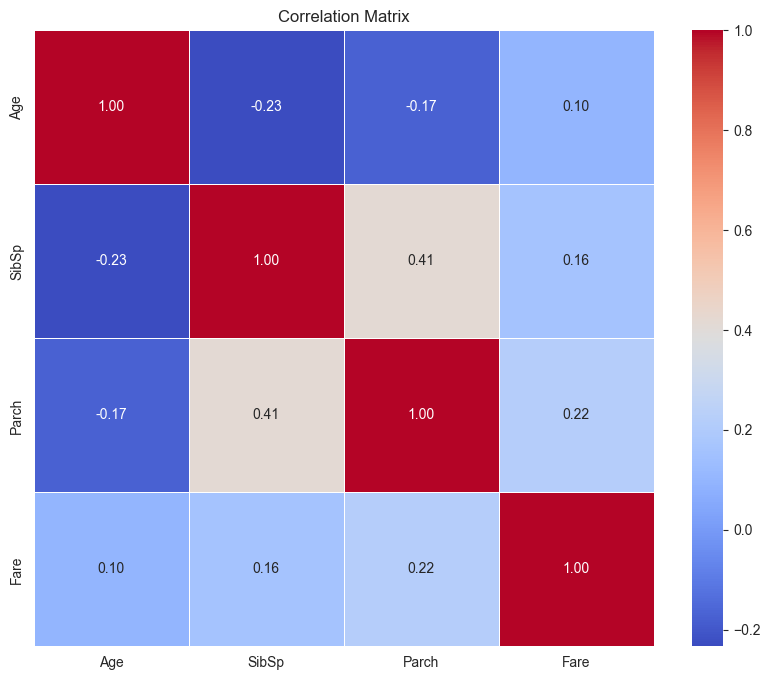

In [129]:
numeric_cols = titanic.select_dtypes(include=['number']).columns
correlation_matrix = titanic[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Since I don't have many numeric columns, most are objects, my correlation matrix isn't very useful for insights. I can only say one thing: the count of siblings/spouses has a positive correlation with the count of parents/children, although the relationship isn't very strong. At least it's something :)

# Visualizations

To explore my dataset better, i decided to make some visualizations

### How many people survived?

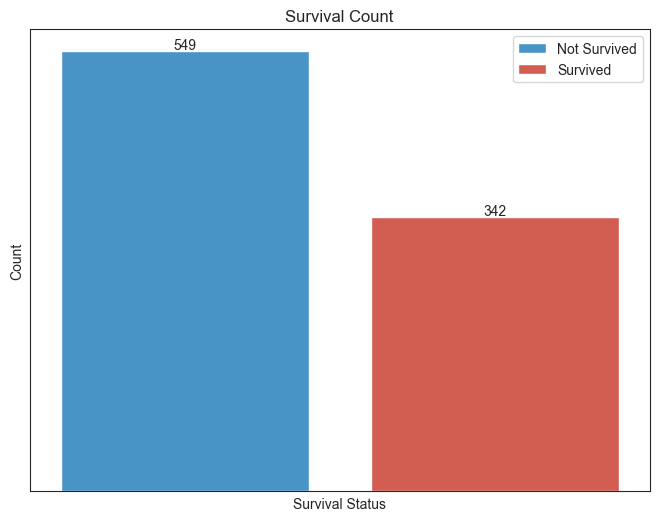

In [130]:
sns.set_style("white")

colors = ["#3498db", "#e74c3c"]
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Survived', data=titanic, palette=colors)
total = len(titanic)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.0f}'.format(height),
            ha="center")

plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count')
plt.xticks([])
plt.yticks([])
plt.legend(labels=['Not Survived', 'Survived'], loc='upper right')

plt.show()

### How many siblings/spouse have come with one passenger?

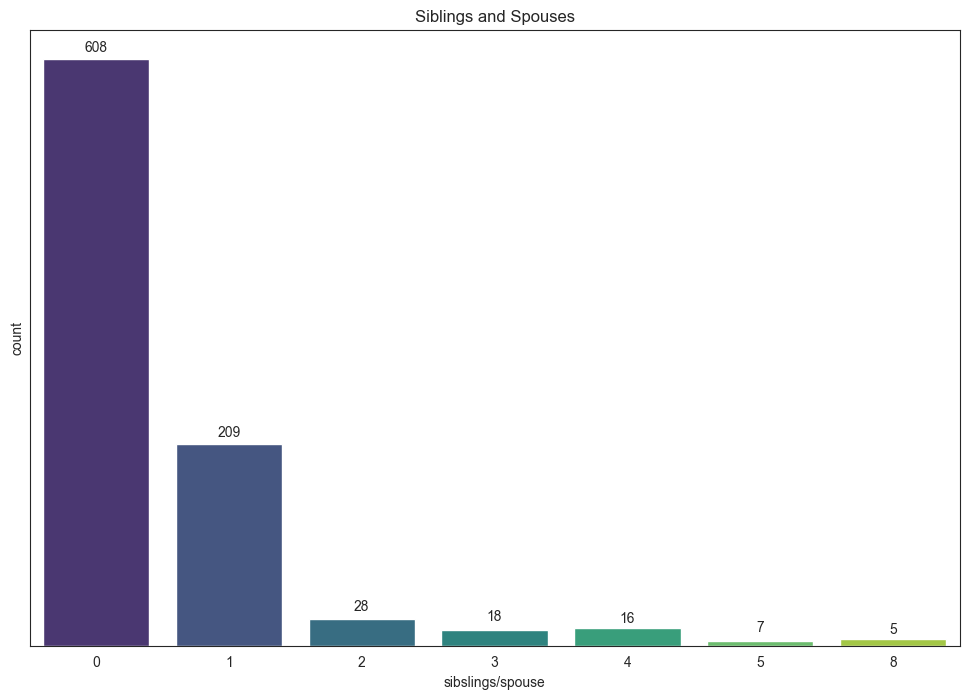

In [131]:
siblings=titanic['SibSp'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=siblings.index, y=siblings.values, palette='viridis')


for i, value in enumerate(siblings.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.title('Siblings and Spouses')
plt.xlabel('sibslings/spouse')
plt.ylabel('count')
plt.yticks([])
plt.show()


### How many parents/children have come with one passenger?

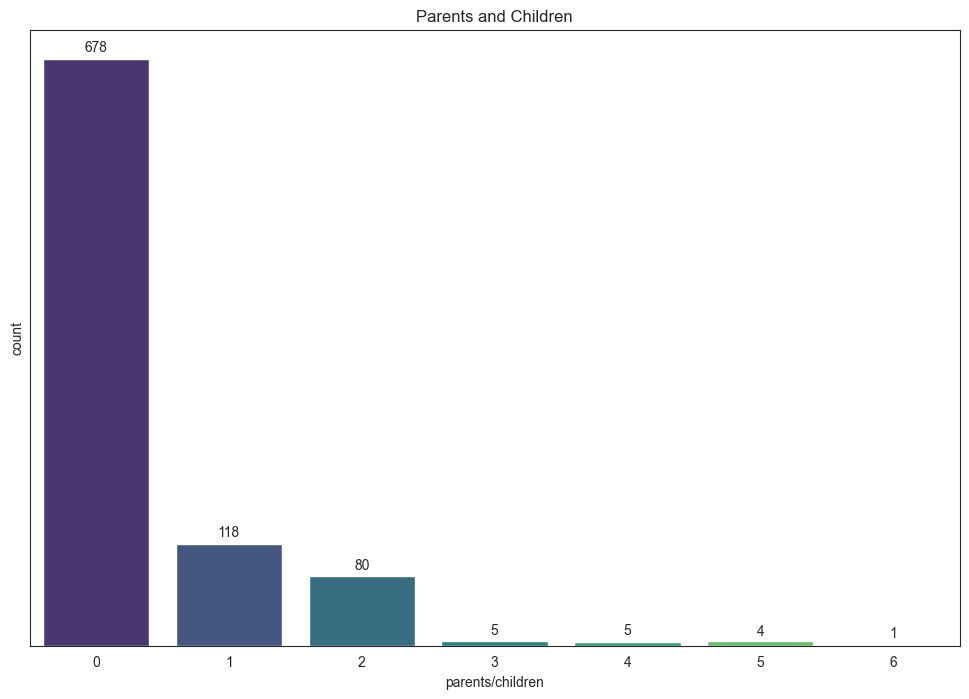

In [132]:
parents=titanic['Parch'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=parents.index, y=parents.values, palette='viridis')

for i, value in enumerate(parents.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.title('Parents and Children')
plt.xlabel('parents/children')
plt.ylabel('count')
plt.yticks([])
plt.show()

### How many males/females are there?

In [133]:
gender = titanic['Sex'].value_counts()

fig = px.pie(gender, 
             values=gender.values, 
             names=gender.index, 
             title='Passengers by Sex',
             hole=0.3)
fig.update_layout(title_x=0.5)
fig.show()

### Journey Of Titanic

In [134]:
port_coordinates = {
    'Cherbourg': (49.643, -1.605),  
    'Queenstown': (51.849, -8.298),   
    'Southampton': (50.897, -1.404)    
}

m = folium.Map(location=[49.94, -6.06], zoom_start=5)

marker_cluster = MarkerCluster().add_to(m)


for port, coordinates in port_coordinates.items():
    folium.Marker(location=coordinates, popup=port).add_to(marker_cluster)

m

# Meaningful analysis

1. Women were more likely to survive than men.  <br>
2. The port of embarkation (Embarked) had an impact on survival rates.<br>
3. There was a difference in survival rates between different age groups, with children and elderly passengers more likely to survive. <br>
4. Passengers who paid higher fares (Fare) were more likely to survive.<br>

### 1 and 2  

In [135]:
survived_passengers = titanic[titanic['Survived'] == 'survived']
survived_passengers_by_embarked_sex = survived_passengers.groupby(['Embarked', 'Sex']).size().reset_index(name='Count')

fig = px.bar(survived_passengers_by_embarked_sex, 
             x='Embarked', 
             y='Count', 
             color='Sex', 
             barmode='group',
             title='Number of Survivors by Gender and Embarkation Port')


fig.update_layout(xaxis_title='Embarkation Port', 
                  yaxis_title='Number of Survivors')
fig.update_layout(title_x=0.5)

fig.show()

In [136]:
dead_passengers = titanic[titanic['Survived'] == 'dead']
dead_passengers_by_embarked_sex = dead_passengers.groupby(['Embarked', 'Sex']).size().reset_index(name='Count')

fig = px.bar(dead_passengers_by_embarked_sex, 
             x='Embarked', 
             y='Count', 
             color='Sex', 
             barmode='group',
             title='Number of Deads by Gender and Embarkation Port')


fig.update_layout(xaxis_title='Embarkation Port', 
                  yaxis_title='Number of Dead people')
fig.update_layout(title_x=0.5)

fig.show()

### 3 and 4

In [137]:
fig = px.scatter_3d(titanic, 
                    x='Age', 
                    y='Fare', 
                    z='Survived',
                    color='Fare',
                    color_continuous_scale='viridis',  # Set color scale
                    title='Do age and fare have an effect on whether people survive or die?')

fig.update_layout(scene=dict(
                    xaxis_title='Age',
                    yaxis_title='Fare',
                    zaxis_title='Survived'),
                  )


camera = dict(
    up=dict(x=0, y=0, z=1), 
    center=dict(x=0, y=0, z=0),  
    eye=dict(x=-1.25, y=-1.25, z=1.25)  
)
fig.update_layout(scene_camera=camera,title_x=0.5)
fig.show()

# Novelty Component 

In [138]:
embarked_options = [('All', '')] + [(port, port) for port in titanic['Embarked'].unique()]
pclass_options = [('All', '')] + [(str(pclass), pclass) for pclass in titanic['Pclass'].unique()]


embarked_dropdown = Dropdown(options=embarked_options, description='Embarked:')
pclass_dropdown = Dropdown(options=pclass_options, description='Pclass:')


def update_plot(embarked, pclass):
    filtered_data = titanic.copy() 
    if embarked:
        filtered_data = filtered_data[filtered_data['Embarked'] == embarked]
    if pclass:
        filtered_data = filtered_data[filtered_data['Pclass'] == (pclass)]
    
   
    fig = go.Figure(data=[go.Histogram(x=filtered_data['Age'], 
                                       marker_color='skyblue', 
                                       opacity=0.75)])
    fig.update_layout(title='Age Distribution',
                      xaxis_title='Age',
                      yaxis_title='Count')
    fig.show()


interact(update_plot, embarked=embarked_dropdown, pclass=pclass_dropdown);

interactive(children=(Dropdown(description='Embarked:', options=(('All', ''), ('Southampton', 'Southampton'), …

In [139]:
dropdown_column = widgets.Dropdown(
    options=titanic.columns,
    value='Age',
    description='Select Column:'
)


output_plot = widgets.Output()

def update_plot(selected_column):
    with output_plot:
        output_plot.clear_output()
        fig = go.Figure(data=go.Histogram(x=titanic[selected_column]))
        fig.update_layout(title=f'Histogram of {selected_column}')
        fig.show()



display(output_plot)


widgets.interactive(update_plot, selected_column=dropdown_column)

Output()

interactive(children=(Dropdown(description='Select Column:', index=3, options=('Survived', 'Pclass', 'Sex', 'A…

In [140]:
dropdown_column_x = widgets.Dropdown(
    options=titanic.columns,
    value='Age',
    description='Select X-axis Column:'
)

dropdown_column_y = widgets.Dropdown(
    options=titanic.columns,
    value='Fare',
    description='Select Y-axis Column:'
)

dropdown_plot_type = widgets.Dropdown(
    options=['Scatter Plot', 'Bar Chart', 'Histogram', 'Line Plot', 'Box Plot'],
    value='Scatter Plot',
    description='Select Plot Type:'
)

output_plot = widgets.Output()

def update_plot(selected_column_x, selected_column_y, selected_plot_type):
    with output_plot:
        output_plot.clear_output()
        if selected_plot_type == 'Scatter Plot':
            fig = go.Figure(data=go.Scatter(x=titanic[selected_column_x], y=titanic[selected_column_y], mode='markers'))
        elif selected_plot_type == 'Bar Chart':
            fig = go.Figure(data=go.Bar(x=titanic[selected_column_x], y=titanic[selected_column_y]))
        elif selected_plot_type == 'Histogram':
            fig = go.Figure(data=go.Histogram(x=titanic[selected_column_x]))
        elif selected_plot_type == 'Line Plot':
            fig = go.Figure(data=go.Scatter(x=titanic[selected_column_x], y=titanic[selected_column_y], mode='lines'))
        elif selected_plot_type == 'Box Plot':
            fig = go.Figure(data=go.Box(y=titanic[selected_column_y]))
        
        
        fig.update_layout(title=f'{selected_plot_type} of {selected_column_y} vs {selected_column_x}',
                          xaxis_title=selected_column_x,
                          yaxis_title=selected_column_y)
        fig.show()


display(output_plot)


widgets.interactive(update_plot, selected_column_x=dropdown_column_x, selected_column_y=dropdown_column_y, selected_plot_type=dropdown_plot_type)

Output()

interactive(children=(Dropdown(description='Select X-axis Column:', index=3, options=('Survived', 'Pclass', 'S…

# Artur Mkrtchyan